<a href="https://colab.research.google.com/github/JARVIS7786/Elevate_Labs/blob/main/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

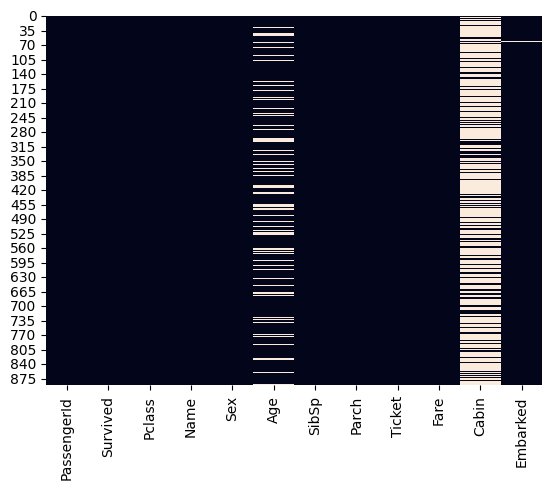

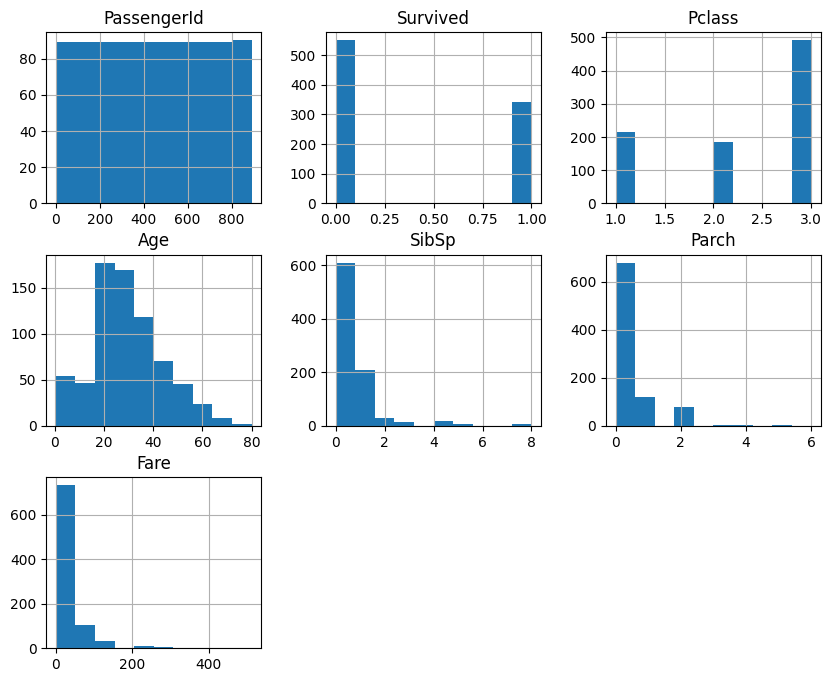

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

sns.heatmap(df.isnull(), cbar=False)
plt.show()

df.hist(figsize=(10, 8))
plt.show()

Value counts for Name:
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64


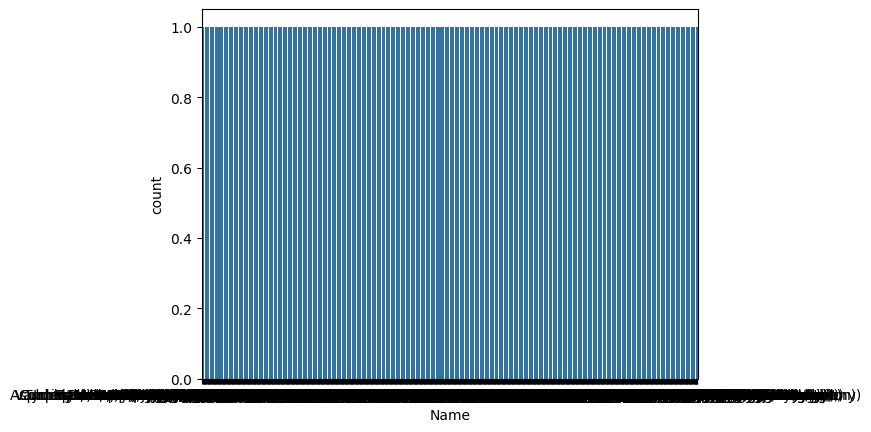

Value counts for Sex:
Sex
male      577
female    314
Name: count, dtype: int64


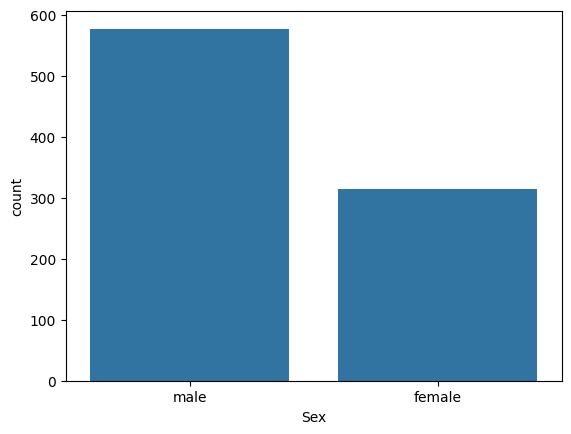

Value counts for Ticket:
Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64


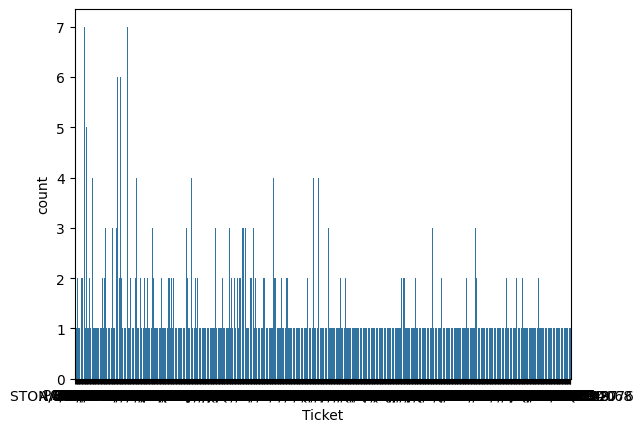

Value counts for Cabin:
Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64


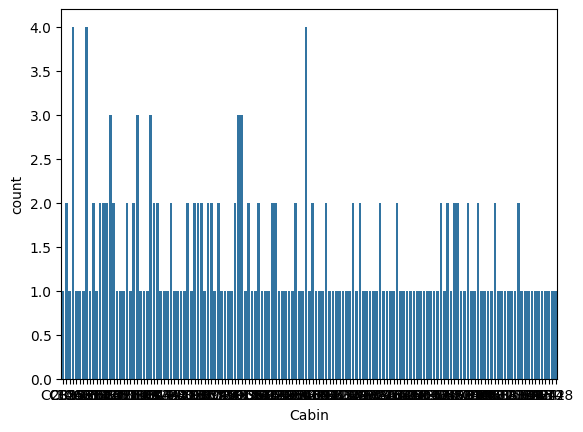

Value counts for Embarked:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


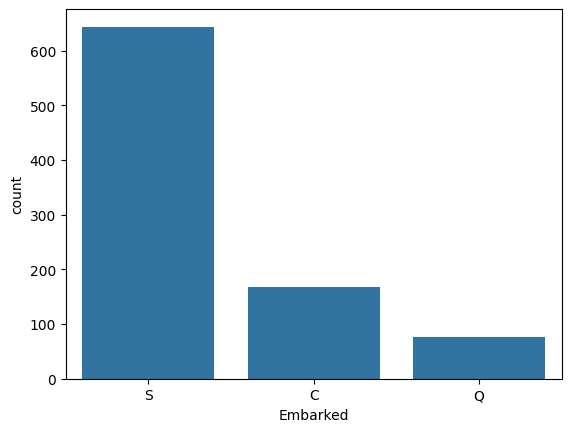

In [7]:
# Analyze the distribution of categorical features
for col in df.select_dtypes(include=['object']):
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    sns.countplot(x=col, data=df)
    plt.show()

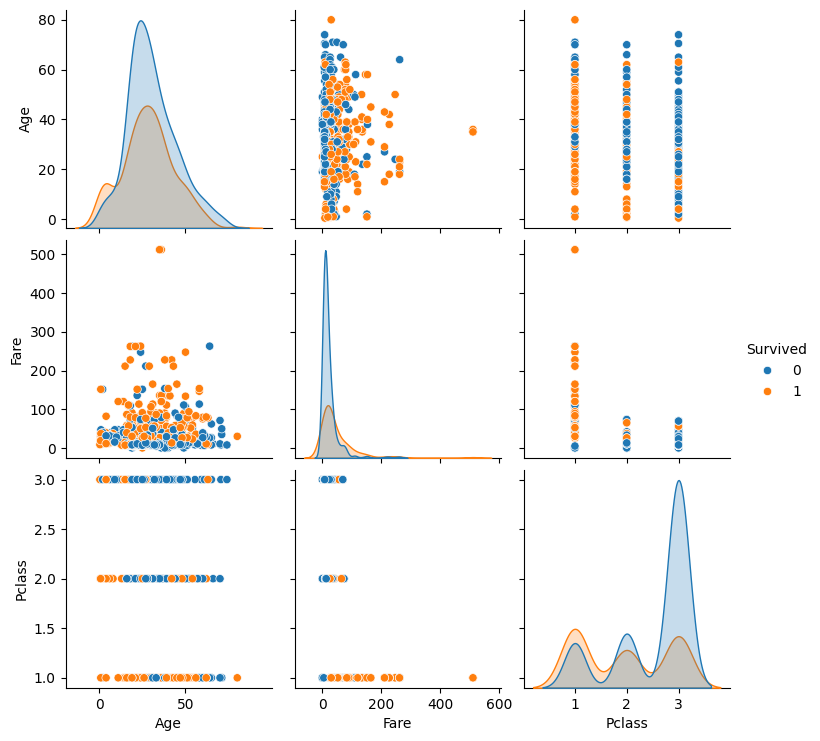

In [8]:

sns.pairplot(df, hue='Survived', vars=['Age', 'Fare', 'Pclass'])
plt.show()

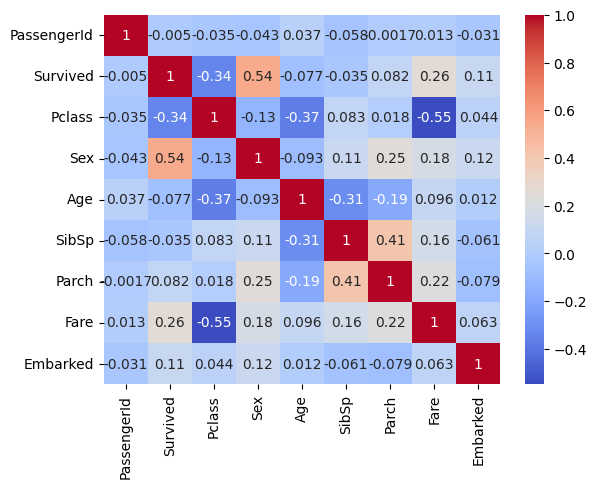

In [11]:

# Before calculating the correlation matrix, handle non-numeric columns
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df_numeric = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


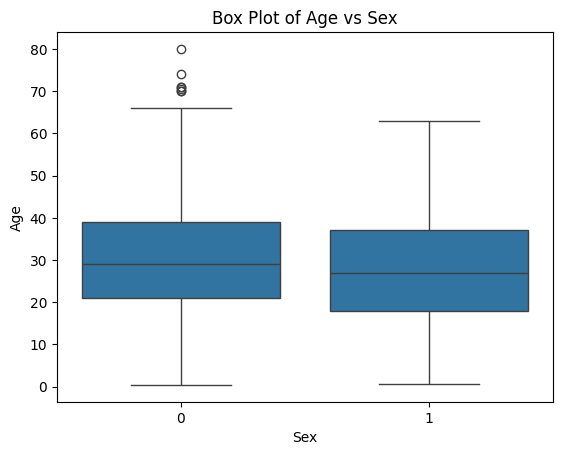

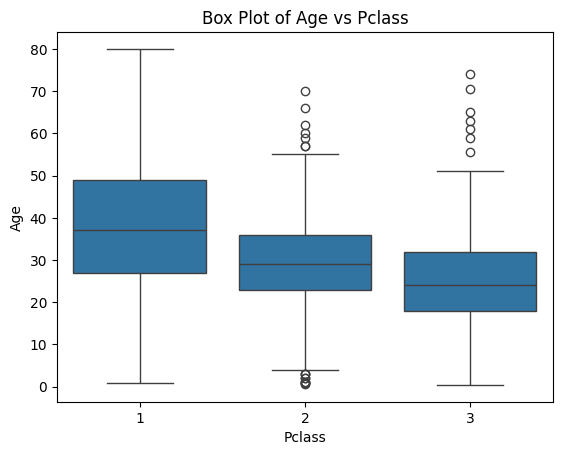

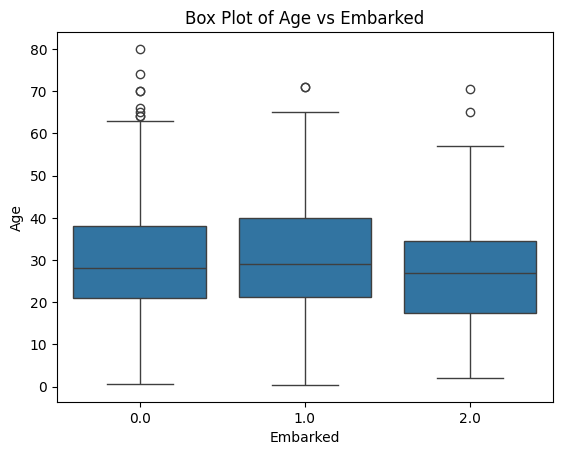

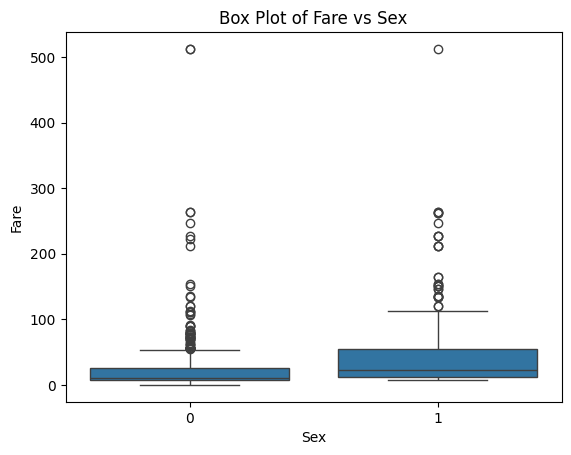

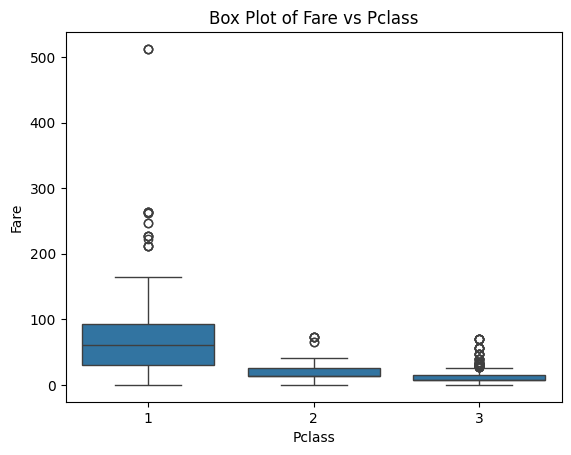

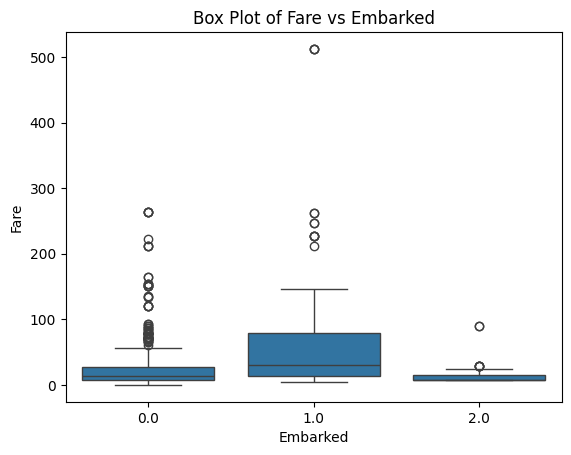

In [12]:
# Box plots to see the distribution of numerical features across different categories
for col in ['Age', 'Fare']:
  for cat in ['Sex', 'Pclass', 'Embarked']:
      sns.boxplot(x=cat, y=col, data=df)
      plt.title(f"Box Plot of {col} vs {cat}")
      plt.show()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64


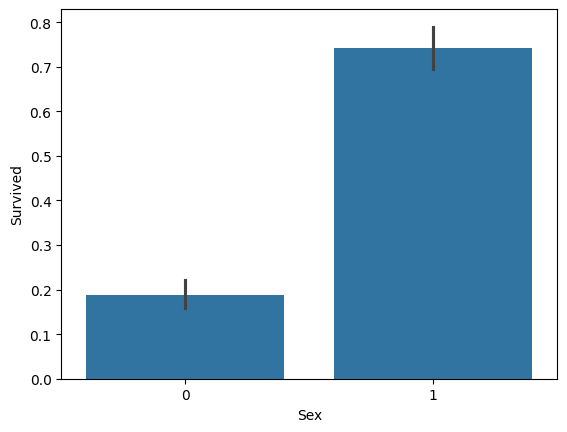

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


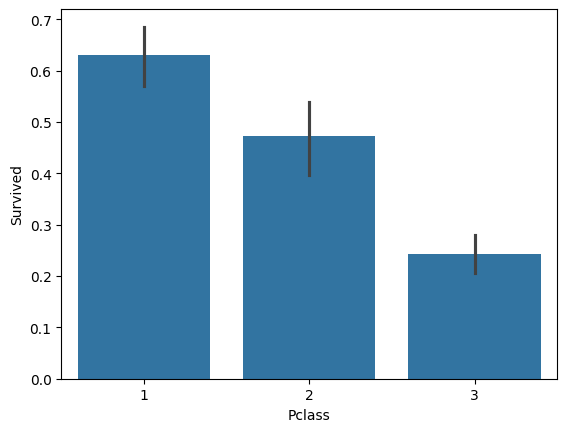

Embarked
0.0    0.336957
1.0    0.553571
2.0    0.389610
Name: Survived, dtype: float64


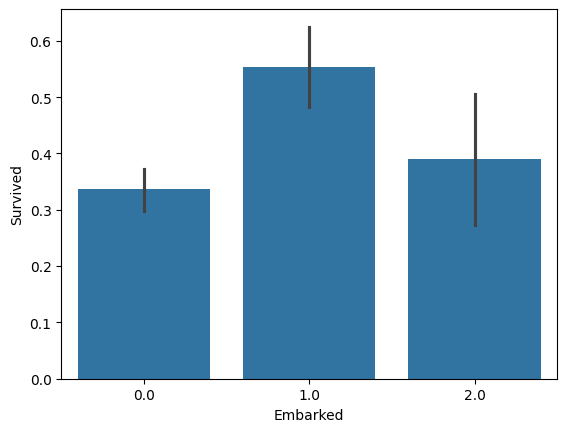

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


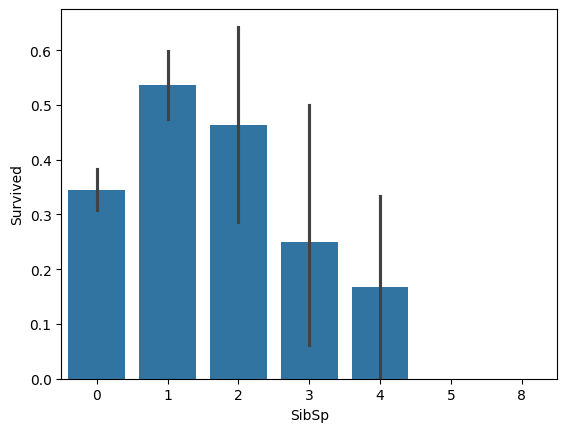

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


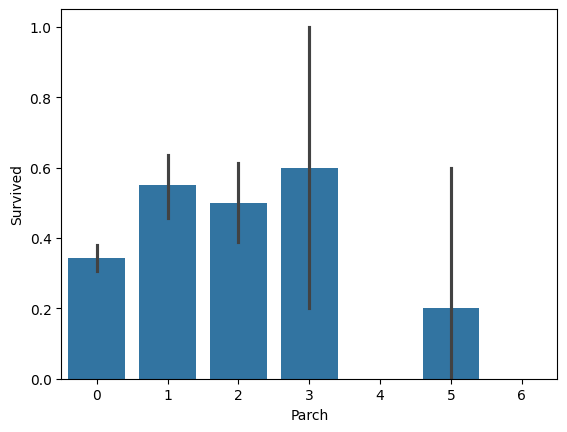

In [13]:

# Analyze survival rate by different features
for col in ['Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']:
    print(df.groupby(col)['Survived'].mean())
    sns.barplot(x=col, y='Survived', data=df)
    plt.show()


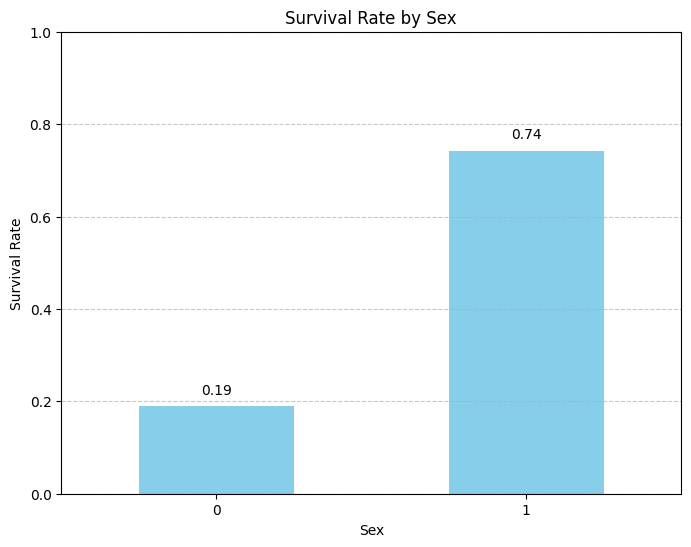

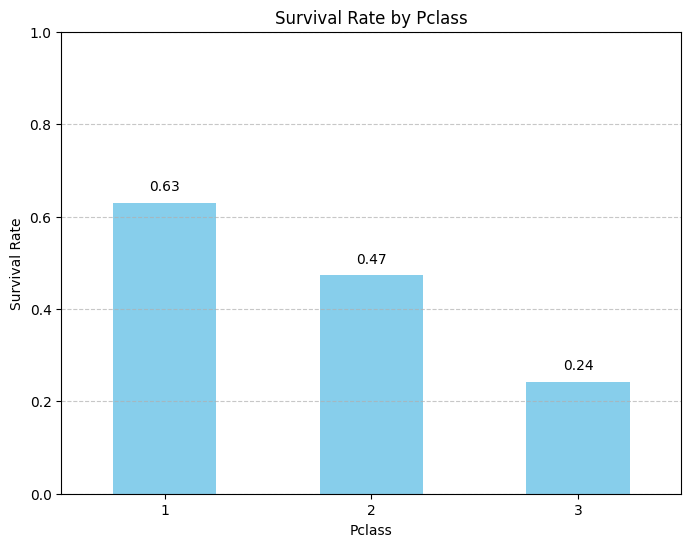

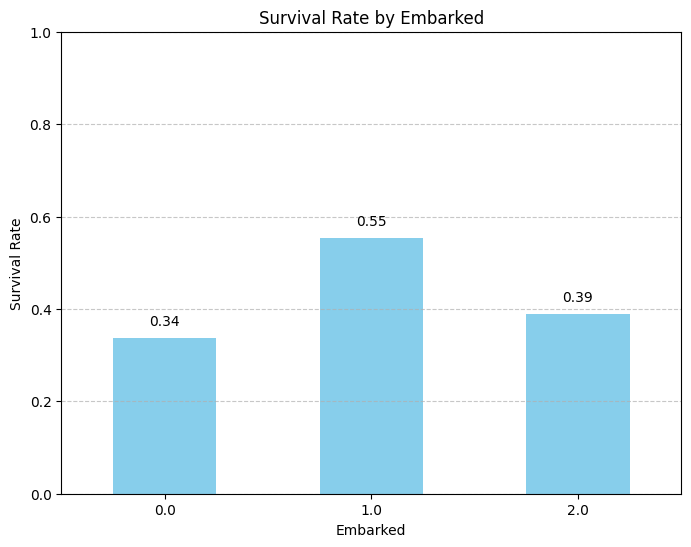

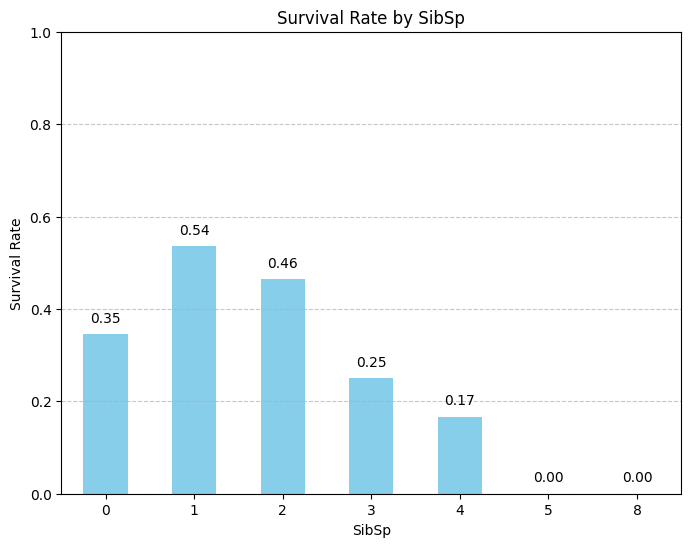

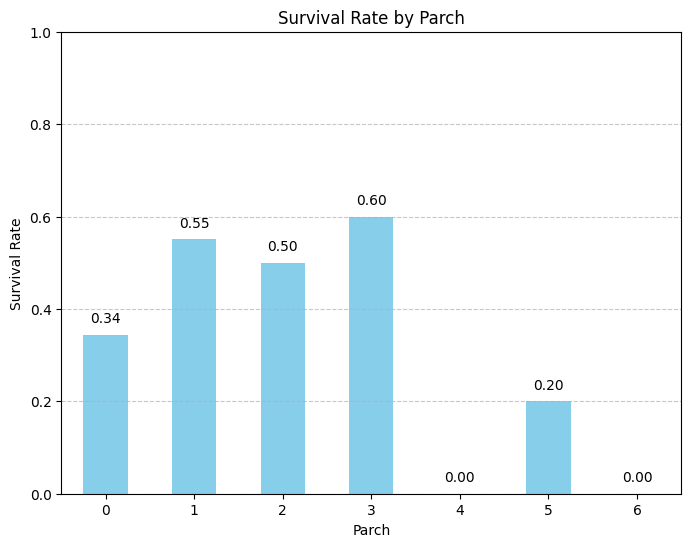

In [14]:
# prompt: give a graph to do eda

import matplotlib.pyplot as plt
# Analyze survival rate by different features with a more informative graph
for col in ['Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']:
    survival_rates = df.groupby(col)['Survived'].mean()
    plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
    survival_rates.plot(kind='bar', color='skyblue')
    plt.title(f'Survival Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Survival Rate')
    plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
    plt.ylim(0, 1)  # Set y-axis limits to 0 and 1 for survival rate
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
    for i, rate in enumerate(survival_rates):
        plt.text(i, rate + 0.02, f'{rate:.2f}', ha='center', va='bottom')  # Add data labels
    plt.show()
